In [39]:
# Importing requests to extract content from a url
import requests   
# Beautifulsoup is for web scrapping...used to scrap specific content 
from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob as tb

In [40]:
def get_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [41]:
url="http://www.imdb.com/title/tt8242548/reviews?ref_=tt_urv"
response = requests.get(url)
print(response.status_code)
# create soup object to iterate over the extracted content 
soup = bs(response.content,"html")


#print(soup)
# Extracting the content under specific tags  
reviews = soup.findAll("span",attrs={"class","a-size-base review-text-content"})
reviews = soup.findAll("div", attrs={"class","text"})

for i in range(len(reviews)):
    reviews[i]=reviews[i].text.strip('\n')

200


In [42]:
#creating a dataframe
import pandas as pd
series_reviews= pd.DataFrame(columns= ['Reviews'])
series_reviews['Reviews']= reviews
series_reviews

,Reviews
0,On one hand Amazon Studios has given us shows ...
1,Hypocritical is what this show is. Every secon...
2,Total waste of time. Its so cringy that I coul...
3,Unable to give less than 1 to this series. Thi...
4,Flop show don't watch u will be there regretti...
5,Worst show ever. No story or skillful acting o...
6,"Pathetic acting, story and direction. It's a w..."
7,"Horrible. Just Horrible. No Storyline, No Scri..."
8,Four More Shots Please (A Pretentious Prime Or...
9,"After watching for 10 minutes, i want break th..."


In [43]:
def get_subjectivity(reviews):
    return tb(reviews).sentiment.subjectivity

def get_polarity(reviews):
    return tb(reviews).sentiment.polarity

series_reviews['Subjectivity']= series_reviews['Reviews'].apply(get_subjectivity)
series_reviews['Polarity']= series_reviews['Reviews'].apply(get_polarity)
series_reviews

,Reviews,Subjectivity,Polarity
0,On one hand Amazon Studios has given us shows ...,0.543333,0.193333
1,Hypocritical is what this show is. Every secon...,0.545556,-0.287381
2,Total waste of time. Its so cringy that I coul...,0.375000,-0.100000
3,Unable to give less than 1 to this series. Thi...,0.524242,-0.119394
4,Flop show don't watch u will be there regretti...,0.375000,-0.125000
5,Worst show ever. No story or skillful acting o...,0.500000,-0.500000
6,"Pathetic acting, story and direction. It's a w...",0.472222,-0.362500
7,"Horrible. Just Horrible. No Storyline, No Scri...",0.725000,-0.450000
8,Four More Shots Please (A Pretentious Prime Or...,0.562587,0.051821
9,"After watching for 10 minutes, i want break th...",0.454545,0.136364


In [44]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('ggplot')

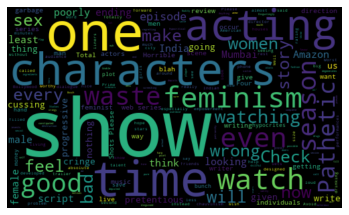

In [45]:
all_words= ' '.join([rev for rev in series_reviews['Reviews']])
wordCloud= WordCloud(width= 500, height= 300, random_state= 21, max_font_size= 120).generate(all_words)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [46]:
def get_analysis(score):
    if score> 0:
        return 'Positive'
    elif score< 0:
        return 'Negative'
    else:
        return 'Neutral'

series_reviews['Analysis']= series_reviews['Polarity'].apply(get_analysis)
series_reviews

,Reviews,Subjectivity,Polarity,Analysis
0,On one hand Amazon Studios has given us shows ...,0.543333,0.193333,Positive
1,Hypocritical is what this show is. Every secon...,0.545556,-0.287381,Negative
2,Total waste of time. Its so cringy that I coul...,0.375000,-0.100000,Negative
3,Unable to give less than 1 to this series. Thi...,0.524242,-0.119394,Negative
4,Flop show don't watch u will be there regretti...,0.375000,-0.125000,Negative
5,Worst show ever. No story or skillful acting o...,0.500000,-0.500000,Negative
6,"Pathetic acting, story and direction. It's a w...",0.472222,-0.362500,Negative
7,"Horrible. Just Horrible. No Storyline, No Scri...",0.725000,-0.450000,Negative
8,Four More Shots Please (A Pretentious Prime Or...,0.562587,0.051821,Positive
9,"After watching for 10 minutes, i want break th...",0.454545,0.136364,Positive


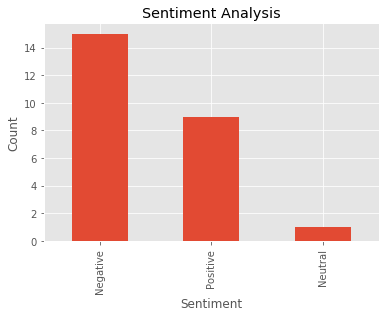

In [47]:
series_reviews['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
series_reviews['Analysis'].value_counts().plot(kind= 'bar')
plt.show()